In [1]:
from model import Invicuna

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python import debug as tf_debug

import numpy as np
from viz import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
config = {'num_bijectors': 0,
          'bijector': 'RealNVP',
          'network_size': 64,
          'use_batchnorm': False,
          'y_dim': 2,
          'batch_size': 20,
          'data_horizon': 10,
          'test_horizon': 10,
          'learning_rate': 1e-3}

In [5]:
class gaussian_dataset:
    def __init__(self,dim,aux_dim):
        self.dim = dim
        self.aux_dim = aux_dim
    
    def sample(self,n_funcs=20,n_samples=20,get_mean=False):
        data = np.zeros((n_funcs,n_samples,self.dim + self.aux_dim))
        mu_list = []
        for i in range(n_funcs):
            mu = 3.0*( np.random.rand(self.dim) > 0.5 ) - 1.5
            mu_list.append(mu)
            
            for j in range(n_samples):
                data[i,j,:self.dim] = mu + 0.5*np.random.randn(self.dim)
                data[i,j,self.dim:] = np.random.randn(self.aux_dim)
        if get_mean:
            return mu_list,data
        
        return data

In [9]:
g1 = tf.Graph()
sess1 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g1)

In [10]:
model = Invicuna(sess1, config)
model.construct_model()

In [11]:
dataset = gaussian_dataset(2,0)

In [12]:
model.train(dataset,4000) 

itr: 0 ; loss: 3.2581449
itr: 20 ; loss: 3.1231773
itr: 40 ; loss: 3.3849306
itr: 60 ; loss: 3.3018029
itr: 80 ; loss: 3.0569642
itr: 100 ; loss: 3.446905
itr: 120 ; loss: 3.3215191
itr: 140 ; loss: 3.3313112
itr: 160 ; loss: 3.4591808
itr: 180 ; loss: 3.1285775
itr: 200 ; loss: 3.3950696
itr: 220 ; loss: 3.2246094
itr: 240 ; loss: 3.244012
itr: 260 ; loss: 3.3545408
itr: 280 ; loss: 3.0707939
itr: 300 ; loss: 3.2323196
itr: 320 ; loss: 3.301543
itr: 340 ; loss: 2.9982104
itr: 360 ; loss: 3.1966805
itr: 380 ; loss: 3.124611
itr: 400 ; loss: 3.1897357
itr: 420 ; loss: 3.218175
itr: 440 ; loss: 3.4032252
itr: 460 ; loss: 3.3099935
itr: 480 ; loss: 3.3512194
itr: 500 ; loss: 3.114114
itr: 520 ; loss: 3.08731
itr: 540 ; loss: 3.2311828
itr: 560 ; loss: 3.1851587
itr: 580 ; loss: 3.2905536
itr: 600 ; loss: 3.2842264
itr: 620 ; loss: 3.1874816
itr: 640 ; loss: 3.068444
itr: 660 ; loss: 3.285796
itr: 680 ; loss: 3.3970149
itr: 700 ; loss: 3.1968951
itr: 720 ; loss: 3.0435975
itr: 740 ; loss: 

KeyboardInterrupt: 

In [20]:
# generate conditioning data
mu, context_x = dataset.sample(n_funcs=1,n_samples=50,get_mean=True)


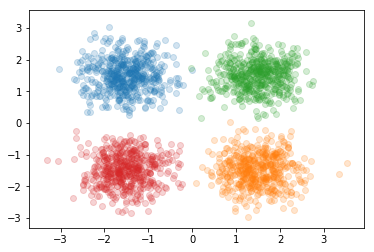

In [27]:
prior_samples = dataset.sample(n_funcs=4, n_samples=500)
for j in range(4):
    plt.scatter(prior_samples[j,:,0], prior_samples[j,:,1], alpha=0.2)
plt.savefig('uncond_dataset.pdf')

In [18]:
model.base.batch_shape

TensorShape([Dimension(None)])

In [13]:
analytic_model = analytic_gaussian_posterior()

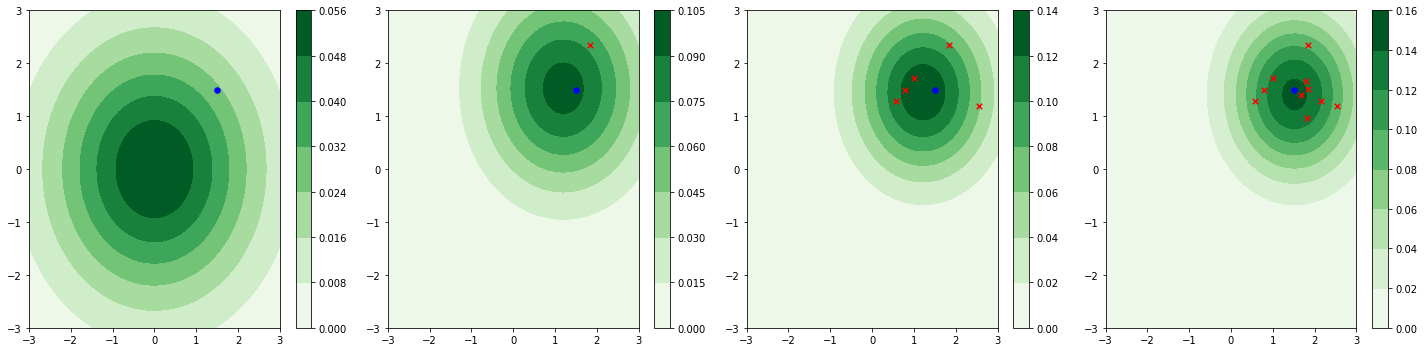

In [21]:
n_vals = [0,1,5,10]
N = len(n_vals)

#context_x = np.array([[[0.,1.5]]])

fig = plt.figure(figsize=[5*N,5])
for i,n in enumerate(n_vals):
    plt.subplot(1,N,i+1)
    plot_likelihood(mu,context_x[:,:n,:],model,x_range=[-3,3],y_range=[-3,3])
    
#     plt.subplot(N,2,2*i+2)
#     plot_likelihood(mu,context_x[:,:n,:],analytic_model,x_range=[-2,5],y_range=[-2,5])

plt.tight_layout()
plt.savefig('gaussian_fitting_noflow.pdf')
plt.show()

In [ ]:
model.get_likelihood(context_x,context_x)

In [82]:
np.transpose(context_x,[1,0,2]).shape

(50, 1, 3)

In [ ]:
model.get_likelihood